# PCHN63101: ANOVA Workshop

## Model Assumptions with Dummy Variables
As a final topic in this part of the lesson, we can illustrate how all the model assumptions we discussed last week carry-over when using dummy variables. After all, this is still a regression model with all the same assumptions still present. Indeed, this is useful because it will also show how the $t$-test assumptions naturally form as special cases of the regression assumptions.

### Assumptions in a $t$-test
To begin with, we can generate all the plots we discussed last week.

In [1]:
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(dummy.mod)

ERROR: Error in eval(expr, envir, enclos): object 'dummy.mod' not found


To begin with, the *Residuals vs Fitted* plot is less relevant with a simply dummy variable model because the assumption of linearity is always met. All we are doing is drawing a line between the means of the two categories. The values in-between are not meaningful in the sense that a dummy value of 0.5 is not somehow half-way between the two groups. Because of this, there no sense in which having a curved line between the categories would make much sense. 

Moving on to the *Q-Q Residuals* plot, this one *is* relevant for our simple $t$-test model. Remember, the normality assumption can also be thought of as the normality of the outcome variable *conditional* on the values of the predictor. When we have a dummy variable, the predictor only has *two* values, meaning that the assumption is that the data is normally distributed for each value of the dummy variable. In other words, normality is assumed *within each category*. This is a natural simplification of what we have seen before, as illustrated in the 3D scatterplot below.

This is therefore one of the rarer cases where we could easily split the raw data into the two groups and then assess normality within each group. However, this is unnecessary when we can just stick to looking at the standardised residuals as usual. As shown in the QQ-plot, no severe deviations from normality are evident here, though there is evidence of a slightly heavier upper-tail.

In terms of the *Scale-Location* plot, this is also of importance because the traditional $t$-test assumes homogeneity of variance. In other words, that the variance of the population distribution that each group is sampled from is identical. This can be assessed in the same fashion as any other regression model, where we look for an equal scattering of points around the horizontal line. In this instance, there appears to be larger variance (a more dispersed scattering of points) in the `Other` category compared to the `USA` category. We will see how to deal with this during this week's workshop. 

Finally, for the *Residuals vs Leverage* plot, our main concern is *outliers*. Notice that all data points within the same category have the same amount of leverage. As such, there is little sense in trying to interpret leverage in these types of model. If a single category has high leverage, all that means is that the group average is quite different from the other categories. Given that this is what we are interested in, it does not really matter, especially as this will not just be a single datapoint influencing the fit but a whole *group* of datapoints. Outliers, however, will matter because they will potentially bias the group means. Looking along the vertical axis, however, we can see no points that are particularly extreme, if we use a cut-off of $|t_{i}| > 3$. 

### Assumptions in an ANOVA

## The Regression ANOVA $F$-test
As a final point, it is interesting to note that we did not actually need to do any of the calculations above, because the results were provided all along at the bottom of the summary table for the full model.

In [ ]:
summary(full.mod)


Call:
lm(formula = mpg ~ 1 + origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947


Notice that the very last line says:

`F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947`

which is exactly the results from the ANOVA table. In general, it is customary to always provide an omnibus test of the *whole* regression model, by comparing the full model to a model containing only an intercept. Because this model only contains a single predictor, this is then equivalent to the one-way ANOVA. In general, if there are multiple predictor variables, this will not be the same. However, the omnibus regression test is useful as a single way of asking the question "is our model actually doing anything?" or "is our model any better than just fitting an intercept?"

## Assumption Violations in ANOVA Models

### Using `gls()` for Violations of Homogeneity of Variance

#### One-way Example

#### Higher-order Example

Generalized least squares fit by REML
  Model: mpg ~ origin 
  Data: mtcars 
       AIC      BIC    logLik
  192.4491 200.6529 -90.22457

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | origin 
 Parameter estimates:
    Japan       USA    Europe 
1.0000000 0.6171796 0.9122182 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 21.807143  1.498187 14.555685  0.0000
originJapan  3.752857  3.130032  1.198984  0.2402
originUSA   -5.668681  1.830585 -3.096649  0.0043

 Correlation: 
            (Intr) orgnJp
originJapan -0.479       
originUSA   -0.818  0.392

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5130471 -0.7420504 -0.2078919  0.7578757  1.8896570 

Residual standard error: 6.145135 
Degrees of freedom: 32 total; 29 residual
Analysis of Deviance Table (Type II tests)

Response: mpg
       Df  Chisq Pr(>Chisq)    
origin  2 16.462  0.0002663 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

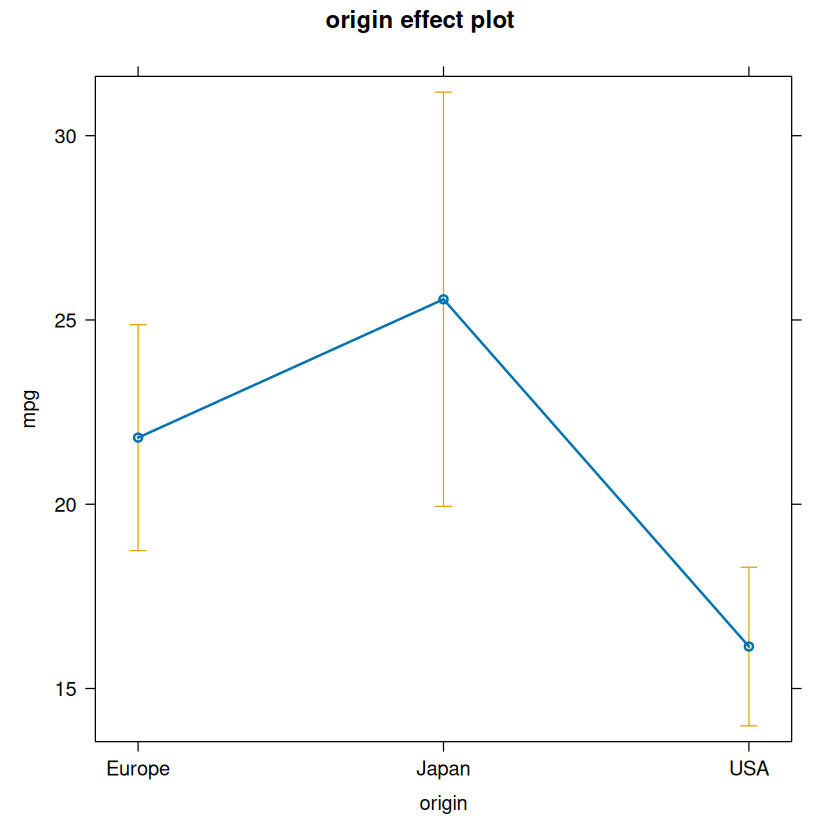

In [ ]:
library(nlme)
library(car)
library(effects)
library(emmeans)

data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')

# Step 1 - convert categorical predictors
mtcars$origin <- as.factor(mtcars$origin)

# Step 2 - fit the model (GLS assuming heterogeneity of variance)
origin.gls.mod <- gls(mpg ~ origin, data=mtcars, weights=varIdent(form = ~1|origin))
print(summary(origin.gls.mod))

# Step 3 - generate the ANOVA table
anova.tbl <- Anova(origin.gls.mod)
print(anova.tbl)

# Step 4 - generate follow-up tests
follow.up <- emmeans(origin.gls.mod, specs=pairwise ~ origin, adjust='holm')
print(follow.up$contrasts)
print(confint(follow.up$contrasts))

# Step 5 - extract and plot effects
effs <- allEffects(origin.gls.mod)
plot(effs)

## 3-way ANOVA and Beyond

## Other Model Comparison Methods

### $R^{2}$

### AIC and BIC